In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Input, Reshape
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Datasets/Resized')

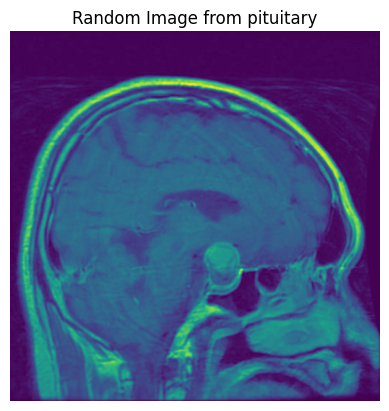

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Resized/Training'  # in case the folder is in the same directory as the script
subdirectories = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
random_subdir = random.choice(subdirectories)
subdir_path = os.path.join(path, random_subdir)
image_files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
randomFile = random.choice(image_files)

image_path = os.path.join(subdir_path, randomFile)
image = Image.open(image_path)

plt.imshow(image)
plt.title(f"Random Image from {random_subdir}")  # Add a title to the plot
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Resized/Training'

from tensorflow.keras.layers import Attention, Dense, Conv2D, MaxPooling2D, Flatten, LSTM, Reshape, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(128, 128, 1))  # contoh input MRI grayscale 128x128
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

x = Reshape((x.shape[1], 1))(x)

x = LSTM(50, activation='relu')(x)

attention = Attention()([x, x])  # Self-attention mechanism
attention_output = Flatten()(attention)

output = Dense(4, activation='softmax')(x)  # 5 kelas tumor

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 57600, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,420 (114.92 KB)

 Trainable params: 29,420 (114.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/Colab Notebooks/Datasets/Resized/Training'  # Path ke folder training
test_dir = '/content/drive/MyDrive/Colab Notebooks/Datasets/Resized/Testing'    # Path ke folder testing

train_datagen = ImageDataGenerator(rescale=1./255)

# Data generator untuk testing set (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),     # Sesuaikan ukuran input
    color_mode='grayscale',     # Sesuaikan dengan tipe gambar
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

# Generator untuk testing data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False               # Tidak perlu diacak pada test set
)

Found 100 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(test_data, #changed from train data to test data
                    epochs=5,
                    validation_data=test_data,
                    callbacks=[early_stopping])


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1304s 704s/step - accuracy: 0.0000e+00 - loss: 1.3870 - val_accuracy: 0.2500 - val_loss: 1.3861
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1208s 518s/step - accuracy: 0.1667 - loss: 1.3868 - val_accuracy: 0.2500 - val_loss: 1.3860
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1153s 556s/step - accuracy: 0.1667 - loss: 1.3864 - val_accuracy: 0.2500 - val_loss: 1.3859
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1069s 561s/step - accuracy: 0.3981 - loss: 1.3851 - val_accuracy: 0.2500 - val_loss: 1.3857
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1124s 599s/step - accuracy: 0.3981 - loss: 1.3842 - val_accuracy: 0.2500 - val_loss: 1.3854


In [9]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.1667 - loss: 1.3867
Test accuracy: 0.25, Test loss: 1.385442852973938


2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step


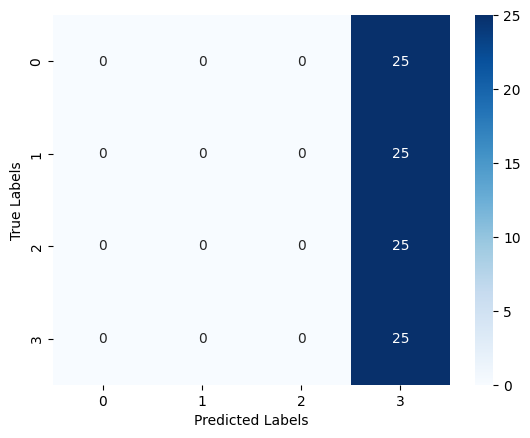

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        25
           3       0.25      1.00      0.40        25

    accuracy                           0.25       100
   macro avg       0.06      0.25      0.10       100
weighted avg       0.06      0.25      0.10       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Menghitung prediksi
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Laporan klasifikasi
print(classification_report(y_true, y_pred_classes))
